In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud
%matplotlib inline

In [2]:
data = pd.read_csv("Cleaned Reddit Data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data.Title = data.Title.astype(str)
data.head()

,RID,Title,URL,Score,Comment_Score,Author,Content,Adult,Flair,Length_Title,Length_Content
0,g76o5f,The real loser Indias errupting Islamaphobia C...,https://www.reddit.com/r/india/comments/g76o5f...,88,53,HairLikeWinterFire,TLDR My unqualified opinion dalit political mo...,False,Politics,59,4775
1,futac9,Pitting community political party fucking stupid,https://www.reddit.com/r/india/comments/futac9...,194,73,chillinvillain122,First let start saying stupid whatever muslims...,False,Politics,48,1091
2,ff8sth,A new political party gave full front page ad ...,https://i.redd.it/yjo9wpy38el41.jpg,736,146,aaluinsonaout,NaN,False,Politics,75,0
3,fxs1vy,Politics time corona WB CM questions Centres c...,https://www.timesnownews.com/india/article/pol...,83,22,ConcernedCitizen034,NaN,False,Politics,82,0
4,fd7q3z,AAPs woeful response Delhi communal violence r...,https://scroll.in/article/954991/aaps-woeful-r...,213,45,Dumma1729,NaN,False,Politics,76,0


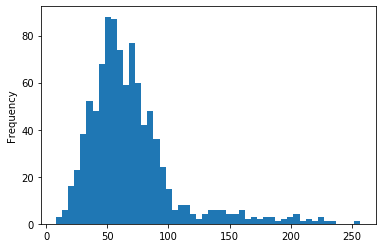

In [5]:
data['Length_Title'].plot(bins=50, kind='hist') 

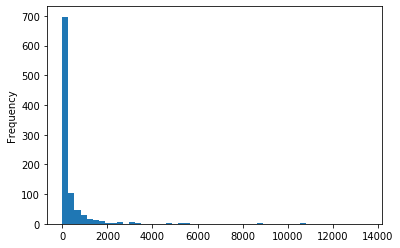

In [6]:
data['Length_Content'].plot(bins=50, kind='hist')

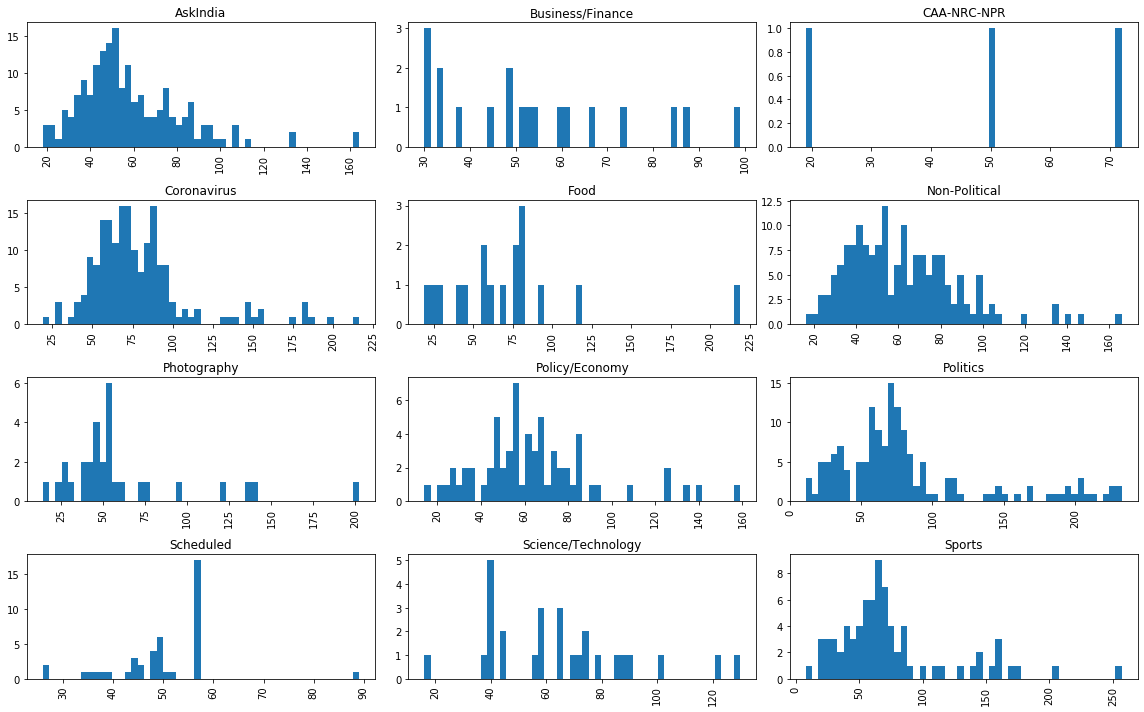

In [8]:
data.hist(column='Length_Title', by='Flair', bins=50,figsize=(16,10))
plt.tight_layout()

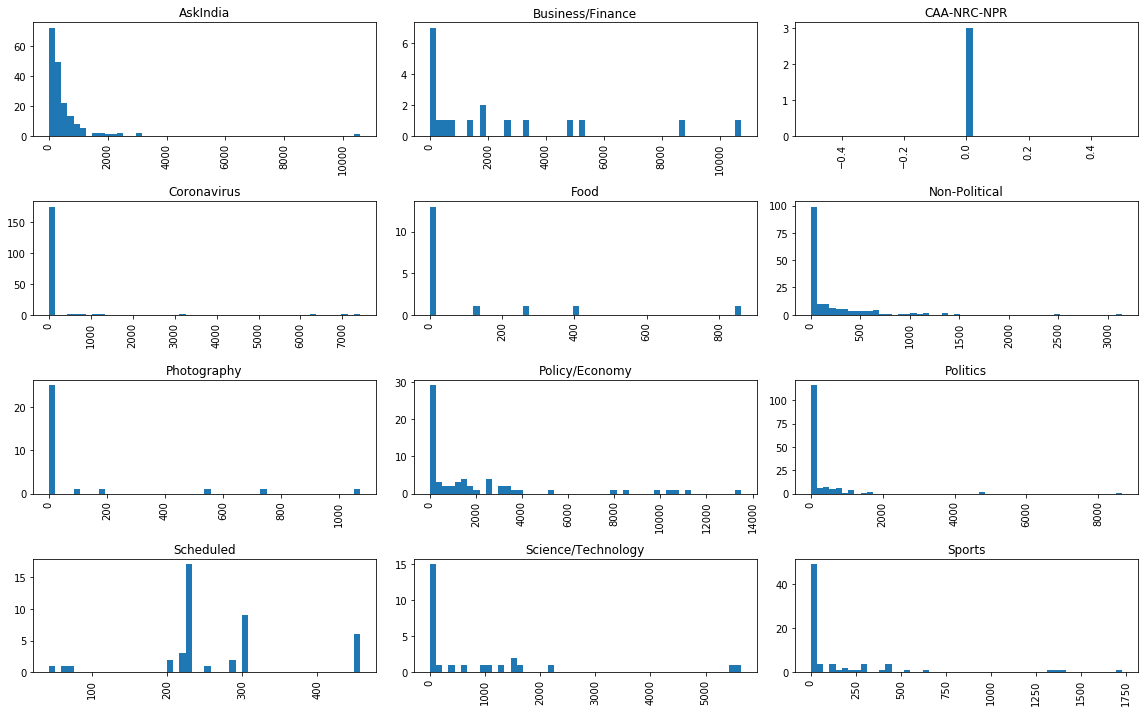

In [9]:
data.hist(column='Length_Content', by='Flair', bins=50,figsize=(16,10))
plt.tight_layout()

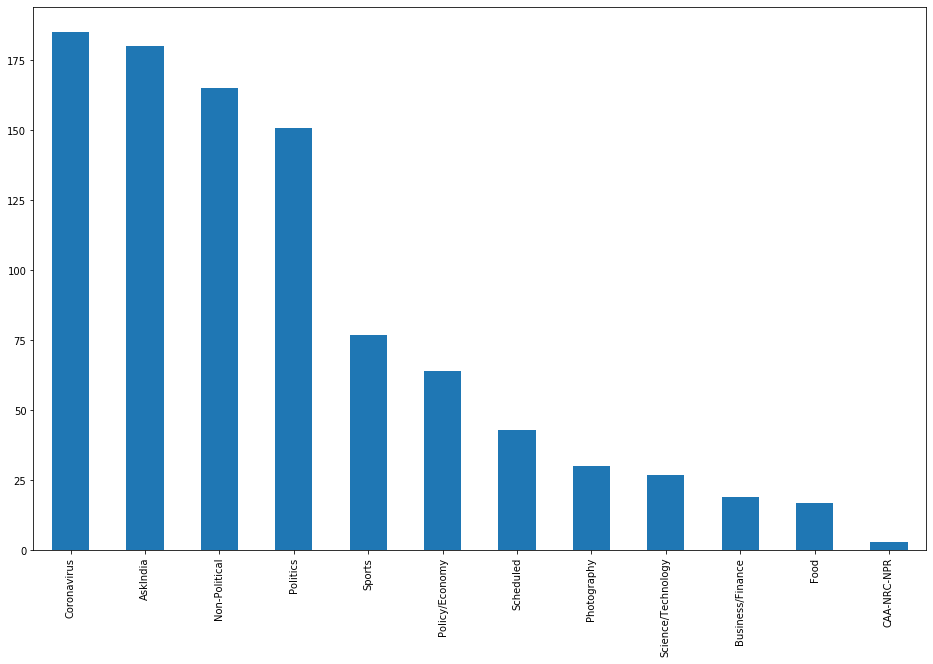

In [10]:
plt.figure(figsize = (16, 10))
data.Flair.value_counts().plot(kind='bar')

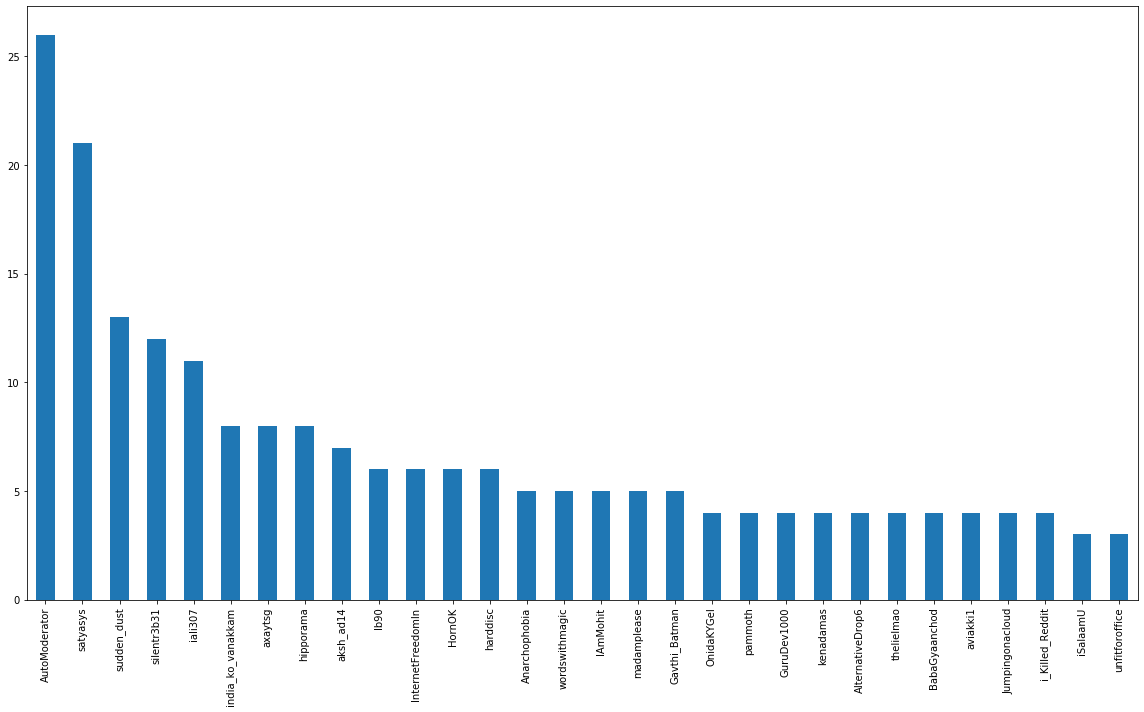

In [11]:
plt.figure(figsize = (16, 10))
data.Author.value_counts().head(30).plot(kind='bar');
plt.tight_layout()

In [12]:
data[data['Author'] == 'AutoModerator']['Flair'].value_counts()

Scheduled    26
Name: Flair, dtype: int64

In [13]:
data['Adult'].value_counts()

False    961
Name: Adult, dtype: int64

Text(0.5, 0.98, 'Scores on Flair')

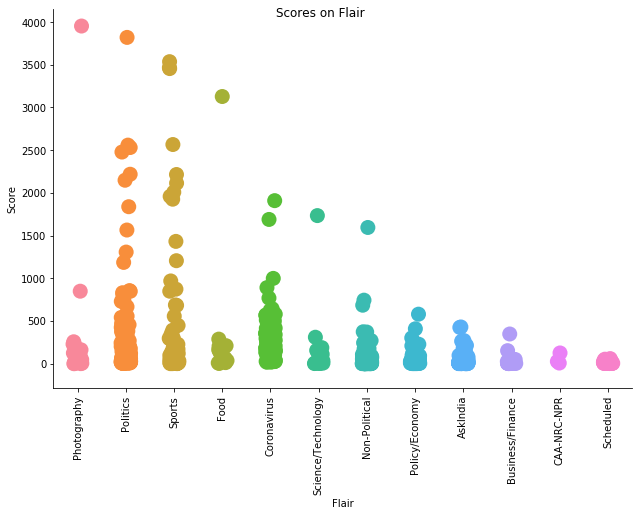

In [14]:
graph = sns.catplot(x='Flair', y='Score', data=data.sort_values(by='Score',ascending=False), kind='strip',s=15,height=6,aspect=1.5)
graph.set_xticklabels(rotation=90)
graph.fig.suptitle('Scores on Flair')

In [15]:
alphabet = []
for i in data['Title']:
    for j in i:
        j.strip(" ")
        alphabet.append(j)        

In [16]:
filtered_alphabet = []
for character in alphabet:
    if not character == " ":
        filtered_alphabet.append(character.lower())

In [17]:
count = {}
for i in filtered_alphabet:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1

In [18]:
sortedDictionary = dict(collections.OrderedDict(sorted(count.items())))
print(sortedDictionary)

{'+': 6, '0': 242, '1': 205, '2': 173, '3': 56, '4': 50, '5': 62, '6': 55, '7': 33, '8': 43, '9': 76, '_': 3, 'a': 5298, 'b': 692, 'c': 2332, 'd': 2496, 'e': 5402, 'f': 669, 'g': 1234, 'h': 1637, 'i': 5382, 'j': 159, 'k': 758, 'l': 2699, 'm': 1525, 'n': 4462, 'o': 4096, 'p': 1747, 'q': 65, 'r': 3563, 's': 4152, 't': 3724, 'u': 1602, 'v': 779, 'w': 780, 'x': 105, 'y': 955, 'z': 52}


In [19]:
word_data = pd.DataFrame({'Alphabet': list(sortedDictionary.keys()), 'Count': list(sortedDictionary.values())})
word_data.head()

,Alphabet,Count
0,+,6
1,0,242
2,1,205
3,2,173
4,3,56


Text(0.5, 1.0, 'Keyboard frequency')

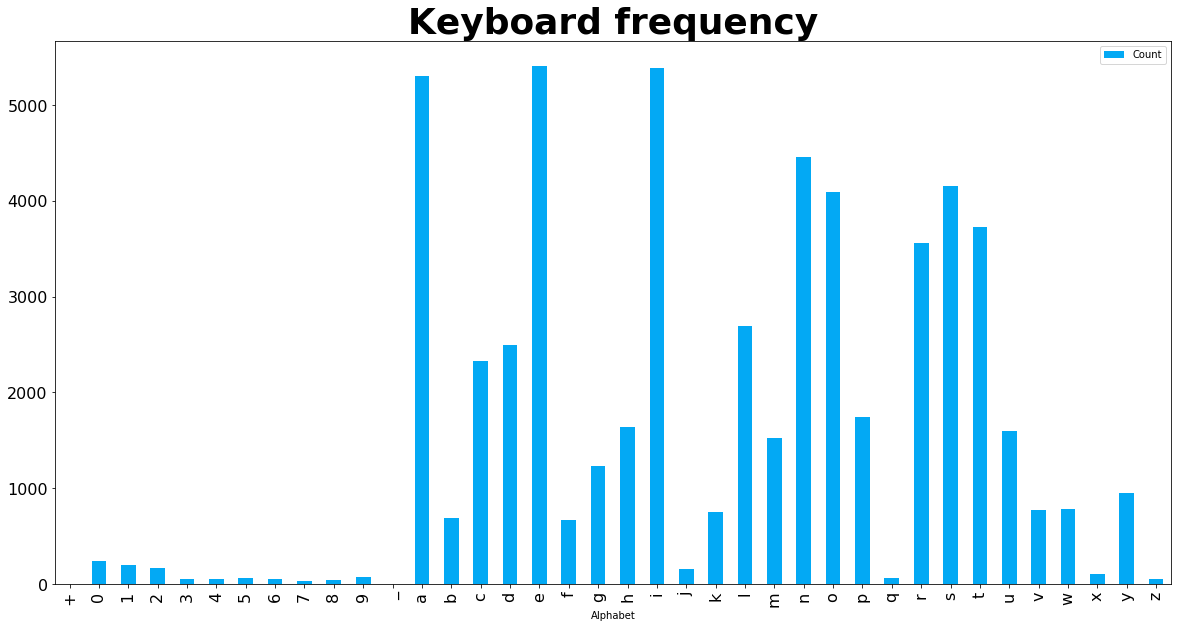

In [20]:
graph = word_data.plot(x = "Alphabet", y = "Count", kind = "bar", figsize = (20,10), color = (0.011, 0.662, 0.956), fontsize = 16)
graph.set_title("Keyboard frequency", fontweight = 'bold', fontsize = 36)

Text(0.5, 1.0, 'Upvotes to Comments')

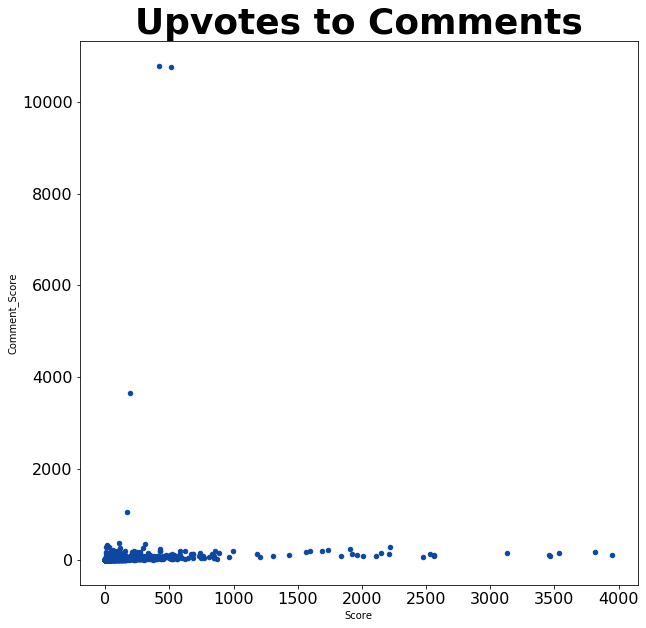

In [21]:
graph_comp = data.plot(figsize = (10,10), kind = "scatter", x = "Score", y = "Comment_Score", color = (0.050, 0.278, 0.631), fontsize = 16)
graph_comp.set_title("Upvotes to Comments", fontweight = 'bold', fontsize = 36)

In [22]:
adult_data = dict(data['Adult'].value_counts())
adult_data = pd.DataFrame({"Label": list(adult_data.keys()), "Count": list(adult_data.values())})

In [24]:
text = dict(data['Author'].value_counts().head(30))

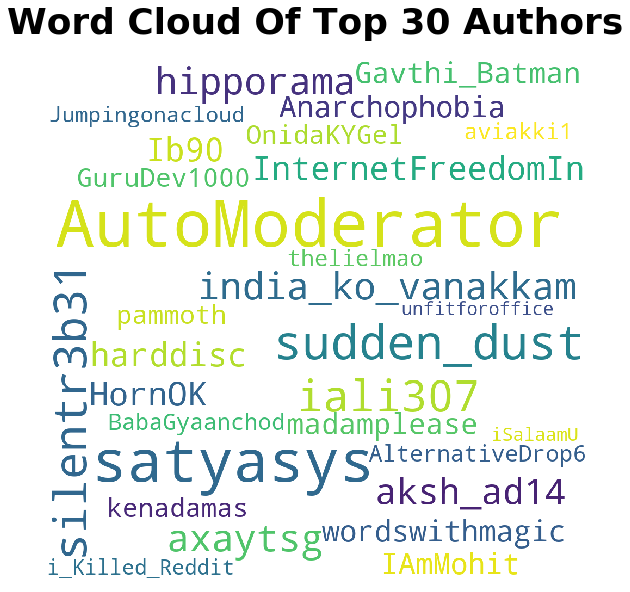

In [25]:
plt.figure(figsize = (16, 10))
cloud = WordCloud(background_color="white",width=1000,height=1000).generate_from_frequencies(text)
plt.axis("off")
plt.title("Word Cloud Of Top 30 Authors", fontweight = 'bold', fontsize = 36)
plt.imshow(cloud)